In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from geopy import geocoders
from geopy.geocoders import Nominatim

In [2]:
%store -r calls_for_service
%store -r calls_for_violent_crimes
calls_for_violent_crimes.count()

address                    1988
address_type               1988
call_dttm                  1988
city                       1988
crime_id                   1988
disposition                1988
offense_date               1988
original_crimetype_name    1988
report_date                1988
state                      1988
dtype: int64

In [3]:
print('No. of calls reporting homicides from 03/31/2016-present: %s'%len(calls_for_service.loc[(calls_for_service['original_crimetype_name'] == 'Homicide')]))
print('No. of calls reporting robberies from 03/31/2016-present: %s'%len(calls_for_service.loc[(calls_for_service['original_crimetype_name'] == 'Robbery')]))
print('No. of calls reporting aggravated assaults from 03/31/2016-present: %s'%len(calls_for_service.loc[(calls_for_service['original_crimetype_name'] == 'Aggravated Assault/ADW')]))
print('No. of calls reporting rape/sexual Assault from 03/31/2016-present: %s'%len(calls_for_service.loc[(calls_for_service['original_crimetype_name'] == 'Rape/Sexual Assault')]))

No. of calls reporting homicides from 03/31/2016-present: 7
No. of calls reporting robberies from 03/31/2016-present: 1771
No. of calls reporting aggravated assaults from 03/31/2016-present: 123
No. of calls reporting rape/sexual Assault from 03/31/2016-present: 87


Occurences of robberies far outnumbered the other crimes, and as such will be heavily represented in any aggregate observations. It will be interesting to look at violent crime both in aggregate and by specific category.

### For which city, more calls were reported for violent crimes?

In [4]:
#Group by Violent crimes by city
calls_for_violent_crimes.groupby(['city','original_crimetype_name']).size()

city           original_crimetype_name
Daly City      Aggravated Assault/ADW        1
               Robbery                       5
Presidio       Robbery                       1
San Francisco  Aggravated Assault/ADW      122
               Homicide                      7
               Rape/Sexual Assault          87
               Robbery                    1759
Treasure Isla  Robbery                       5
Yerba Buena    Robbery                       1
dtype: int64

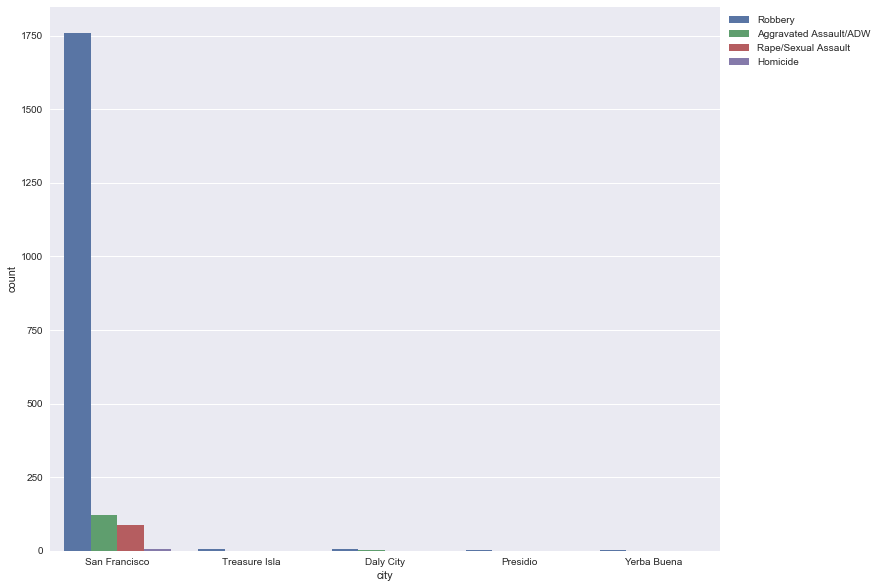

In [5]:
#calls_for_violent_crimes['Reason']=calls_for_violent_crimes['original_crimetype_name'].apply(lambda s:s.split(':')[0])
sns.set(style='darkgrid')
width=12
height=10
figure(figsize=(width,height))
sns.countplot(x='city', hue='original_crimetype_name', data=calls_for_violent_crimes)
plt.legend(bbox_to_anchor=(1,1))

In [6]:
calls_for_violent_crimes['event']= 1
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
#p=pd.pivot_table(calls_for_violent_crimes,values='dummy_variable', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p=calls_for_violent_crimes.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)

Text(0.5,1,'911 Calls for violent crimes by month and hour of the day')

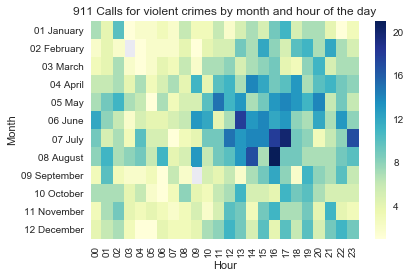

In [7]:
ax = sns.heatmap(p,cmap="YlGnBu")
ax.set_title('911 Calls for violent crimes by month and hour of the day')

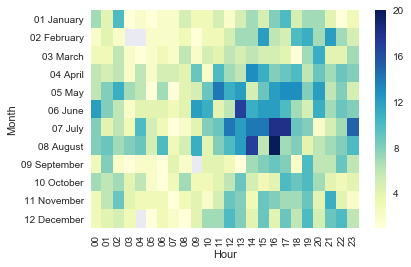

In [8]:
g = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Robbery'))]
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
p=g.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
ax1 = sns.heatmap(p,cmap="YlGnBu")
#ax1.set_title('911 Calls for violent crimes by month and hour of the day')

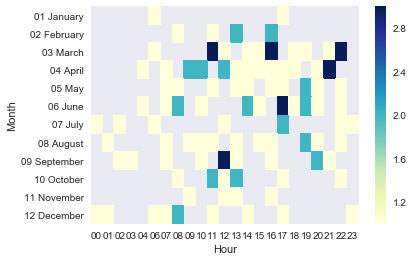

In [9]:
g = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Aggravated Assault/ADW'))]
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
p=g.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
ax1 = sns.heatmap(p,cmap="YlGnBu")

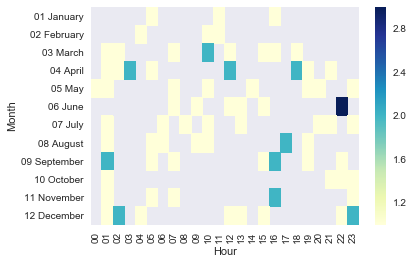

In [10]:
g = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Rape/Sexual Assault'))]
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
p=g.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum)
ax1 = sns.heatmap(p,cmap="YlGnBu")

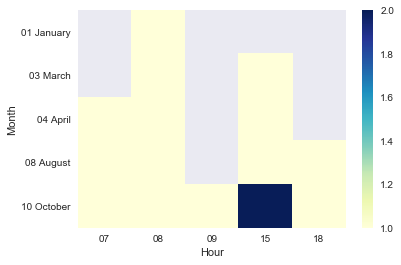

In [11]:
g = calls_for_violent_crimes[(calls_for_violent_crimes.original_crimetype_name.str.match(r'Homicide'))]
calls_for_violent_crimes['Month'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_violent_crimes['Hour'] = calls_for_violent_crimes['call_dttm'].apply(lambda x: x.strftime('%H'))
p=g.pivot_table(index=['Month'] , columns=['Hour'], values='event',aggfunc=np.sum).fillna(method='ffill')
ax1 = sns.heatmap(p,cmap="YlGnBu")

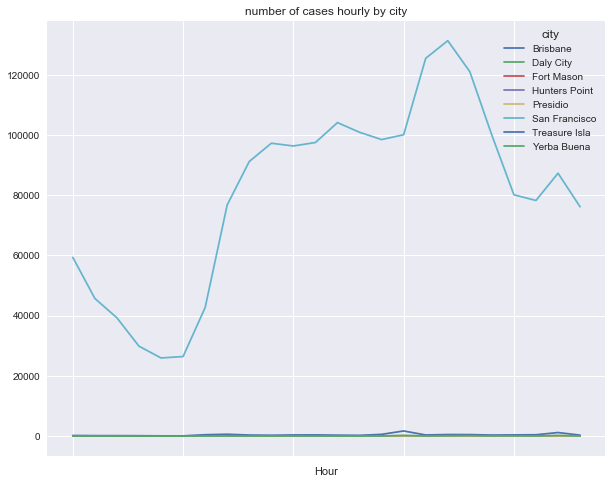

In [12]:
calls_for_service['event']= 1
calls_for_service['Month'] = calls_for_service['call_dttm'].apply(lambda x: x.strftime('%m %B'))
calls_for_service['Hour'] = calls_for_service['call_dttm'].apply(lambda x: x.strftime('%H'))
hourly_city_events = calls_for_service[['city','Hour','event']].groupby(['city','Hour']).count().reset_index()
hourly_city_events_pivot = hourly_city_events.pivot(index='Hour', columns='city', values='event').fillna(method='ffill')
hourly_city_events_pivot.interpolate().plot(title='number of cases hourly by city', figsize=(10,8))

In [13]:
violent_crimes_at_premise_address = calls_for_violent_crimes[calls_for_violent_crimes['address_type']=='Premise Address']
#violent_crimes_at_premise_address['address']= violent_crimes_at_premise_address.apply(lambda x:'%s %s' % (x['address'],x['city']),axis=1)
violent_crimes_at_premise_address.head()
#violent_crimes_at_premise_address.isnull().sum()

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,event,Month,Hour
10,200 Block Of Taylor St,Premise Address,2016-09-20 17:48:00,San Francisco,162643133,REP,2016-09-20T00:00:00.000,Robbery,2016-09-20T00:00:00.000,CA,1,09 September,17
1147,0 Block Of Gough St,Premise Address,2016-09-21 11:54:00,San Francisco,162651899,HAN,2016-09-21T00:00:00.000,Robbery,2016-09-21T00:00:00.000,CA,1,09 September,11
3050,100 Block Of Ellis St,Premise Address,2016-09-22 03:44:00,San Francisco,162660397,REP,2016-09-22T00:00:00.000,Robbery,2016-09-22T00:00:00.000,CA,1,09 September,03
4197,2400 Block Of Geary Bl,Premise Address,2016-09-22 14:32:00,San Francisco,162662420,REP,2016-09-22T00:00:00.000,Robbery,2016-09-22T00:00:00.000,CA,1,09 September,14
4968,100 Block Of Jones St,Premise Address,2016-09-22 20:59:00,San Francisco,162663898,UTL,2016-09-22T00:00:00.000,Robbery,2016-09-22T00:00:00.000,CA,1,09 September,20


In [14]:
address = violent_crimes_at_premise_address['address'].unique()

In [15]:
geolocator =  Nominatim(user_agent="my-application")
loc_coordinates = []
loc_address = []
for address in violent_crimes_at_premise_address.address:
        place = address
        location = geolocator.geocode(place, timeout=15)
        if location:
                lat=location.latitude
                long=location.longitude
        else :
                lat = None
                long = None
        #print(location.address)
        #print("POINT({},{})".format(location.latitude,location.longitude))
        loc_coordinates.append((lat, long))
        loc_address.append(place)
df_geocodes = pd.DataFrame({'coordinate':loc_coordinates,'address':loc_address})

In [16]:
df_geocodes[['lat', 'long']] = df_geocodes['coordinate'].apply(pd.Series)
df_geocodes = df_geocodes.drop('coordinate',axis=1)

In [17]:
df_geocodes=df_geocodes.drop_duplicates()

In [18]:
violent_crimes_at_premise_address= violent_crimes_at_premise_address.merge(df_geocodes, how= 'outer')

In [19]:
violent_crimes_at_premise_address.head()

,address,address_type,call_dttm,city,crime_id,disposition,offense_date,original_crimetype_name,report_date,state,event,Month,Hour,lat,long
0,200 Block Of Taylor St,Premise Address,2016-09-20 17:48:00,San Francisco,162643133,REP,2016-09-20T00:00:00.000,Robbery,2016-09-20T00:00:00.000,CA,1,09 September,17,-23.702427,133.852691
1,200 Block Of Taylor St,Premise Address,2016-06-29 12:49:00,San Francisco,161811905,HAN,2016-06-29T00:00:00.000,Robbery,2016-06-29T00:00:00.000,CA,1,06 June,12,-23.702427,133.852691
2,200 Block Of Taylor St,Premise Address,2016-09-15 20:10:00,San Francisco,162593955,UTL,2016-09-15T00:00:00.000,Aggravated Assault/ADW,2016-09-15T00:00:00.000,CA,1,09 September,20,-23.702427,133.852691
3,0 Block Of Gough St,Premise Address,2016-09-21 11:54:00,San Francisco,162651899,HAN,2016-09-21T00:00:00.000,Robbery,2016-09-21T00:00:00.000,CA,1,09 September,11,37.797135,-122.427082
4,100 Block Of Ellis St,Premise Address,2016-09-22 03:44:00,San Francisco,162660397,REP,2016-09-22T00:00:00.000,Robbery,2016-09-22T00:00:00.000,CA,1,09 September,03,NaN,NaN


In [20]:
#violent_crimes_at_premise_address['lat'].isnull()
violent_crimes_at_premise_address.dropna(subset=['lat'], inplace=True)
violent_crimes_at_premise_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 728
Data columns (total 15 columns):
address                    260 non-null object
address_type               260 non-null object
call_dttm                  260 non-null datetime64[ns]
city                       260 non-null object
crime_id                   260 non-null int64
disposition                260 non-null object
offense_date               260 non-null object
original_crimetype_name    260 non-null object
report_date                260 non-null object
state                      260 non-null object
event                      260 non-null int64
Month                      260 non-null object
Hour                       260 non-null object
lat                        260 non-null float64
long                       260 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 32.5+ KB


In [21]:
import folium # goelogical map
map1 = folium.Map(location=[37.76, -122.45],tiles='OpenStreetMap', zoom_start=12)
for each in violent_crimes_at_premise_address[:100].iterrows():
    folium.CircleMarker([each[1]['lat'],each[1]['long']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['lat'])+','+str(each[1]['long']),
                        fill_color='#FD8A6C'
                        ).add_to(map1)
map1